# `ML Project - Insurance Prediction`

## Import Libraires

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Import DataSet

In [3]:
df = pd.read_csv(r'insurance.csv')

# EDA - Exploratory Data Analysis

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.shape

(1338, 7)

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

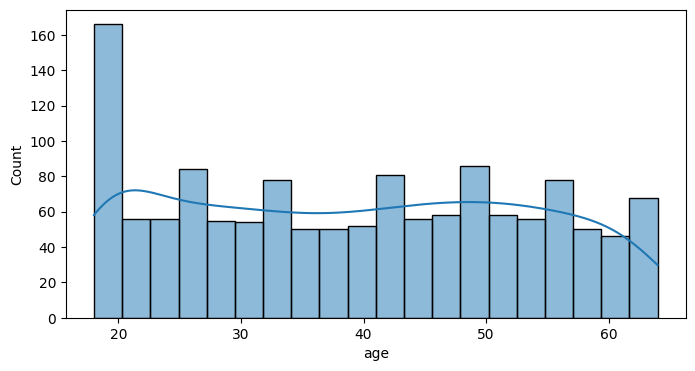

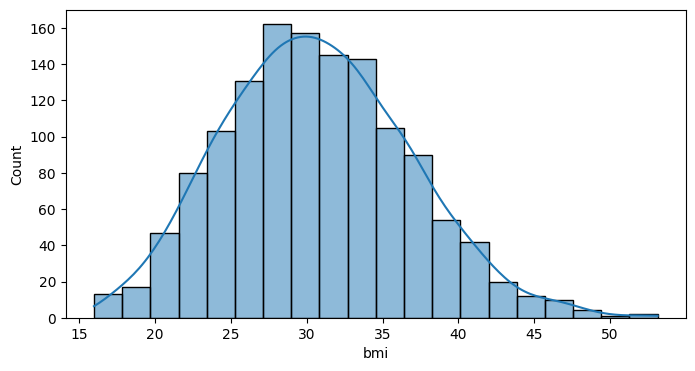

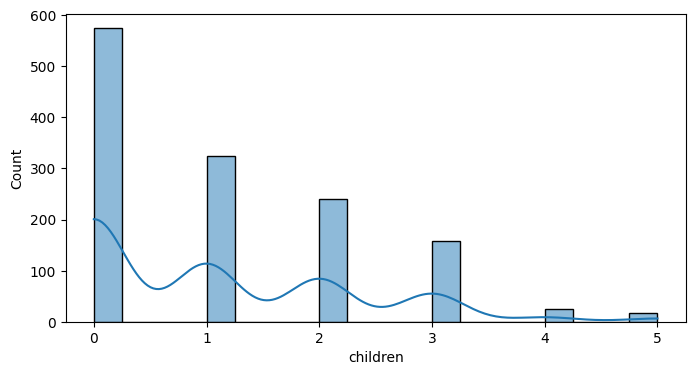

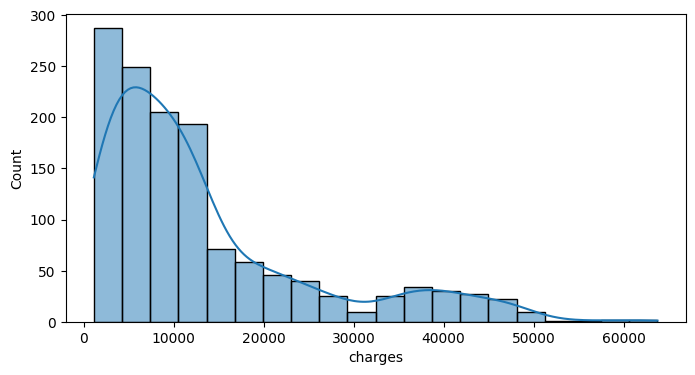

In [10]:
# Visualizing the distribution of numerical data
num_col = ['age', 'bmi', 'children', 'charges']

for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20, palette='GnBu')

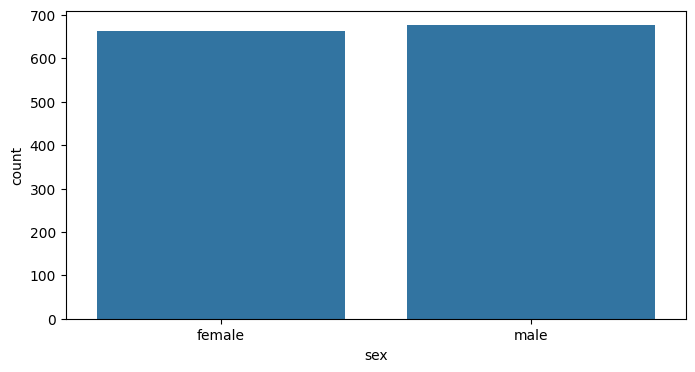

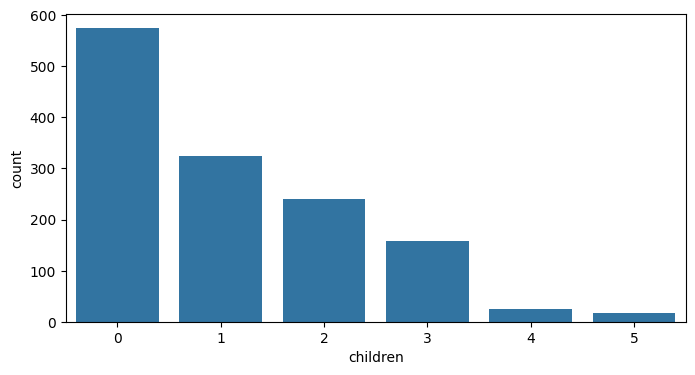

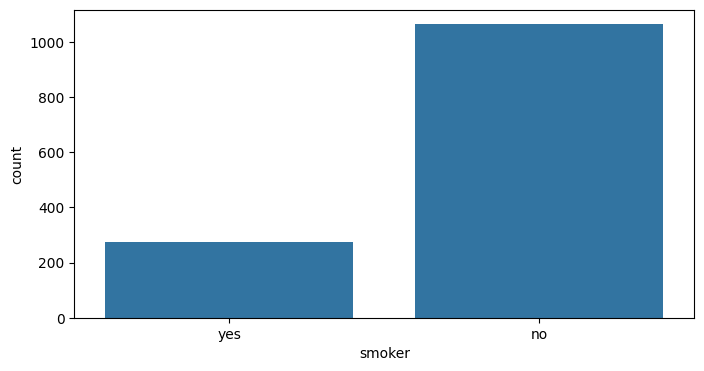

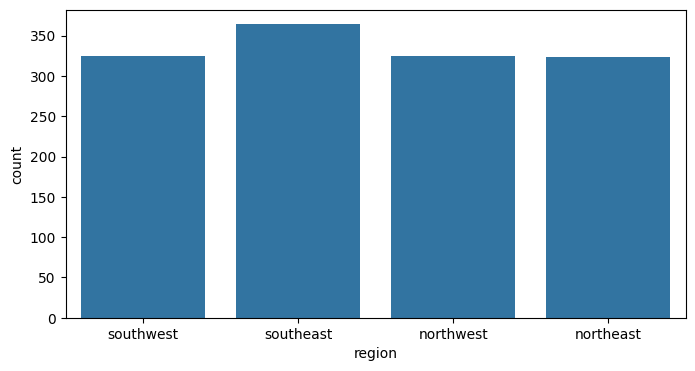

In [11]:
# visualizing categorical Data 

cat_data = [ 'sex', 'children', 'smoker', 'region']

for col in cat_data:
    plt.figure(figsize=(8,4))
    sns.countplot( x = df[col])

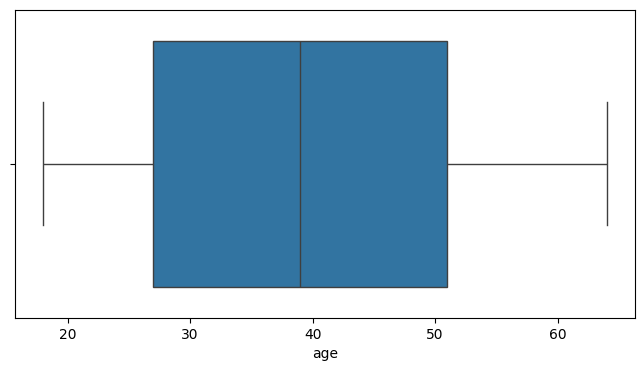

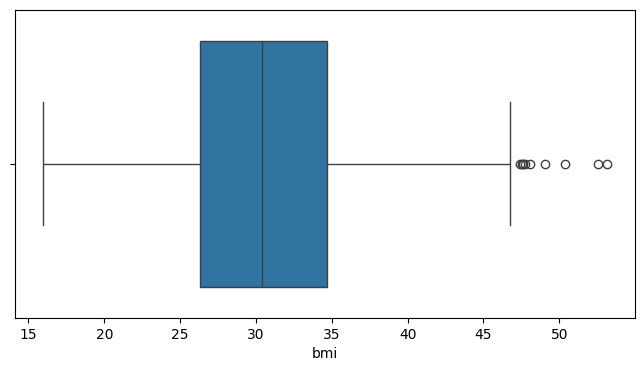

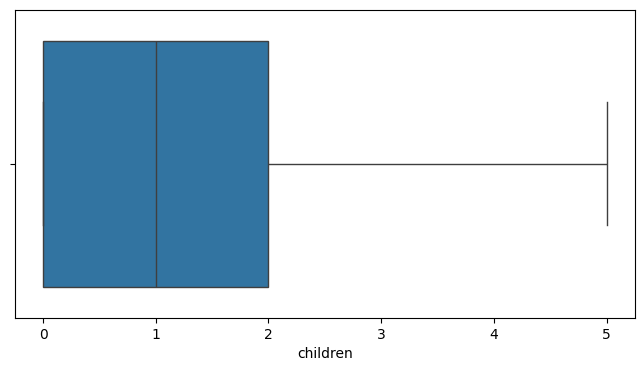

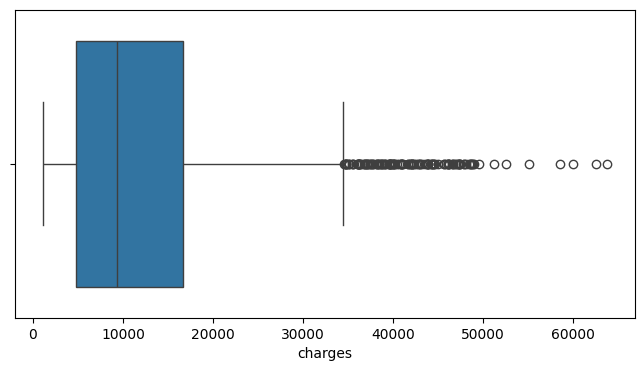

In [12]:
# boxplot of numerical data

for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])

<Axes: >

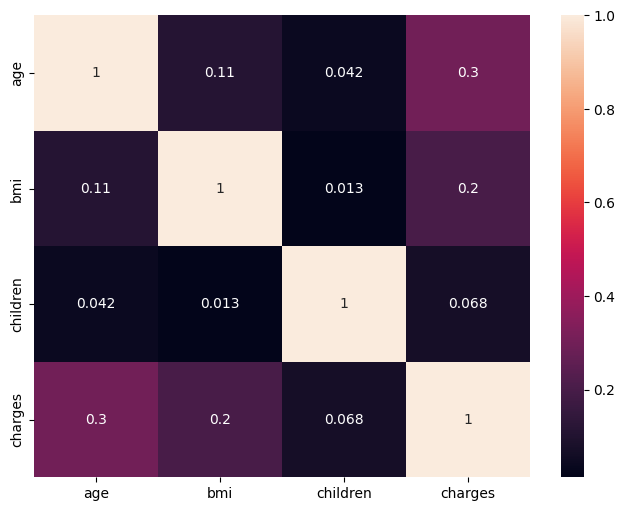

In [13]:
# to see the correlation

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Cleaning and Preprocessing

In [14]:
df_clean = df.copy()
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df_clean.shape

(1338, 7)

In [16]:
# to remove duplicates 

df_clean.drop_duplicates(inplace=True)

In [17]:
df_clean.shape

(1337, 7)

In [18]:
df_clean.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
# to change the data type into numerical
df_clean.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [20]:
# to know - if the categorical is suitable to turn to numerical 
for col in cat_data:
    print(df_clean[col].value_counts())
    print("---------------------------------")

sex
male      675
female    662
Name: count, dtype: int64
---------------------------------
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
---------------------------------
smoker
no     1063
yes     274
Name: count, dtype: int64
---------------------------------
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
---------------------------------


In [21]:
# lets change male - 0 and female - 1

df_clean['sex'] = df_clean['sex'].map({'male': 0, 'female': 1})
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [22]:
# same task to smoker column

df_clean['smoker'] = df_clean['smoker'].map({'yes': 1, 'no': 0})
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [23]:
# now rename both the column to make it more readable

df_clean.rename(columns={
    'sex' : 'is_female',
    'smoker': 'is_smoker'
},inplace=True)

df_clean.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [24]:
# lets encode region in one hot encoding

df_clean = pd.get_dummies(df_clean, columns=['region'])
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [25]:
df_clean = df_clean.astype(int)
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0


# Feauture Engineering

<Axes: xlabel='bmi', ylabel='Count'>

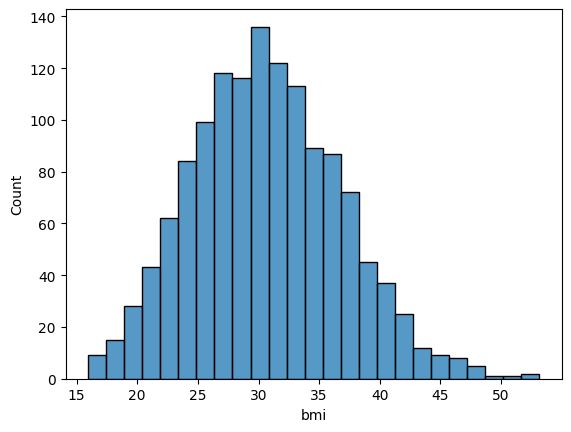

In [26]:
sns.histplot(df['bmi'])

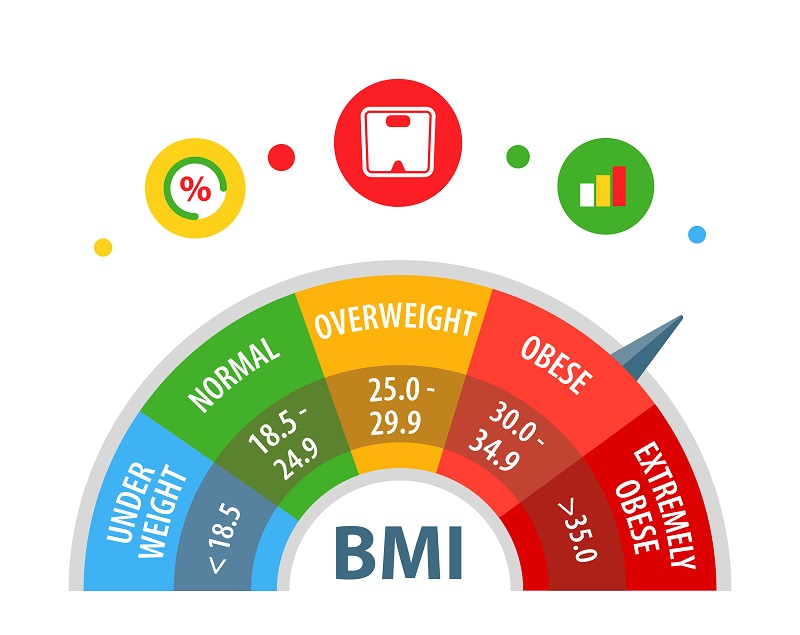

In [27]:
# create new column of category from bmi values

df_clean['bmi_category'] = pd.cut(
    df_clean['bmi'],
    bins = [0,18.5,24.9,29.9,float('inf')],
    labels=['Underweight','Normal','Overweight','Obese']
    
)

In [28]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obese
2,28,0,33,3,0,4449,0,0,1,0,Obese
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight


In [29]:
# now apply get dummies at bmi category

df_clean = pd.get_dummies(df_clean,columns=['bmi_category'])
df_clean = df_clean.astype(int)
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,0,1,0,0,1,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,0,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,0,22,0,0,21984,0,1,0,0,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,0,1,0


# Feature Scaling

In [30]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [31]:
# turning 3 col into normalization where it would be -3 < x < 3 

from sklearn.preprocessing import StandardScaler

cols = ['age','bmi','children']
scaler = StandardScaler()

df_clean[cols] = scaler.fit_transform(df_clean[cols])

df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,0,1,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,0,1,0,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,0,1,0,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,1,0,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,1,0,0,0,0,1,0


# Feature Extraction

In [32]:
# correlations = {
#     'age': pearsonr(df_cleaned['age'], df_cleaned['charges'])[0],
#     'bmi': pearsonr(df_cleaned['bmi'], df_cleaned['charges'])[0]
# }

# {
#   'feature_1': correlation with charges,
#   'feature_2': correlation with charges,
#   ...
# }

In [33]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

### Pearson Correlation 

In [34]:
# lets find the correlation of some col to charges col using pearson

from scipy.stats import pearsonr

selected_feature = ['age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese']  # except charges col

correlations = {
       feature : pearsonr(df_clean[feature],df_clean['charges'])[0] # return tuple
       for feature in selected_feature
}
# list - to insert 2D data to the dataframe
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature','Pearson_Correlation'])

correlations_df.sort_values(by = 'Pearson_Correlation',ascending=False)

,Feature,Pearson_Correlation
4,is_smoker,0.787234
0,age,0.298309
12,bmi_category_Obese,0.200348
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
5,region_northeast,0.005946
6,region_northwest,-0.038695
8,region_southwest,-0.043637
9,bmi_category_Underweight,-0.050599


### Chi Square Test

In [35]:
from scipy.stats import chi2_contingency

categorical_feature = ['is_female', 'is_smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese']

alpha = 0.05 # significant value(not fixed)

# now - we need to make charges feature to a cat. feature, beacause chi square works only on cat features

df_clean['charges_bin'] = pd.qcut(df_clean['charges'],q=4,labels=False)


df_clean.sample(5)

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,charges_bin
388,-0.941810,1,-1.334960,-0.909234,0,3176,0,1,0,0,0,1,0,0,0
32,-1.440418,1,-0.354547,3.239729,0,4687,0,0,0,1,0,0,1,0,0
820,0.411556,0,0.462463,-0.079442,0,7445,0,0,0,1,0,0,0,1,1
1041,-1.511647,0,-1.171557,-0.909234,0,1704,1,0,0,0,0,1,0,0,0
601,0.838934,0,0.135659,-0.909234,0,9174,0,1,0,0,0,0,0,1,1


In [36]:
chi_results = {}  # empty dictionary to turn into dataframe

for col in categorical_feature:
    contingency = pd.crosstab(df_clean[col], df_clean['charges_bin'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency)
    decision = ""
    if p_value > alpha:
        decision = "Drop"
    else:
        decision = "Accept"

    chi_results[col] = {
        'chi2_Statistic': chi2_stat,
        'P_value': p_value,
        "Decision": decision
    }
    
chi2_df = pd.DataFrame(chi_results).T
chi2_df = chi2_df.sort_values(by='P_value')
chi2_df

,chi2_Statistic,P_value,Decision
is_smoker,848.219178,0.0,Accept
region_southeast,15.998167,0.001135,Accept
is_female,10.258784,0.01649,Accept
bmi_category_Obese,8.515711,0.036473,Accept
region_northeast,6.438442,0.092122,Drop
region_southwest,5.091893,0.165191,Drop
bmi_category_Overweight,4.25149,0.235557,Drop
bmi_category_Normal,3.708088,0.29476,Drop
bmi_category_Underweight,3.37403,0.337471,Drop
region_northwest,1.13424,0.768815,Drop


# Final Data Frame - Using Pearson and Chi2

In [37]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese', 'charges_bin'],
      dtype='object')

In [41]:
processed_insurance_data = df_clean[['age', 'is_female', 'children', 'bmi', 'is_smoker', 'charges',
                                     'region_southeast', 'bmi_category_Obese']]
processed_insurance_data.head(10)

,age,is_female,children,bmi,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.909234,-0.517949,1,16884,0,0
1,-1.511647,0,-0.079442,0.462463,0,1725,1,1
2,-0.799350,0,1.580143,0.462463,0,4449,1,1
3,-0.443201,0,-0.909234,-1.334960,0,21984,0,0
4,-0.514431,0,-0.909234,-0.354547,0,3866,0,0
5,-0.585661,1,-0.909234,-0.844753,0,3756,1,0
6,0.482785,1,-0.079442,0.462463,0,8240,1,1
7,-0.158282,1,1.580143,-0.517949,0,7281,0,0
8,-0.158282,0,0.750351,-0.191145,0,6406,0,0
9,1.480002,1,-0.909234,-0.844753,0,28923,0,0
